In [2]:
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt

* How interconnected everyone is?  -> Network density
* Are there any points of failure? —> Identify bridges
* Find out the person / persons with most connections - maybe a person in charge —> Identify bridges, find nodes with highest degrees
* Strongest connections —> highest betweenness centrality (Rating >= 4 and conf == 3)
* Maybe filter by the strongest or the most verified connections (conf == 3)
* What are the discrepancies between the two ratings —> query data frame
* How are they organized?  Are there any groups?
* Looking for cliques and bridges



In [3]:
df = pd.read_csv('data/9_11.csv')
df.columns = ['name1','name2','rating','conf']
df.head()

,name1,name2,rating,conf
0,Hani Hanjour,Nawaf Alhazmi,3,2
1,Hani Hanjour,Khalid Al-Mihdhar,5,2
2,Hani Hanjour,Lotfi Raissi,3,2
3,Hani Hanjour,Bandar Alhazmi,1,1
4,Hani Hanjour,Rayed Mohammed Abdullah,3,2


In [4]:
G = nx.from_pandas_edgelist(df, source='name1', target='name2', edge_attr=True,)

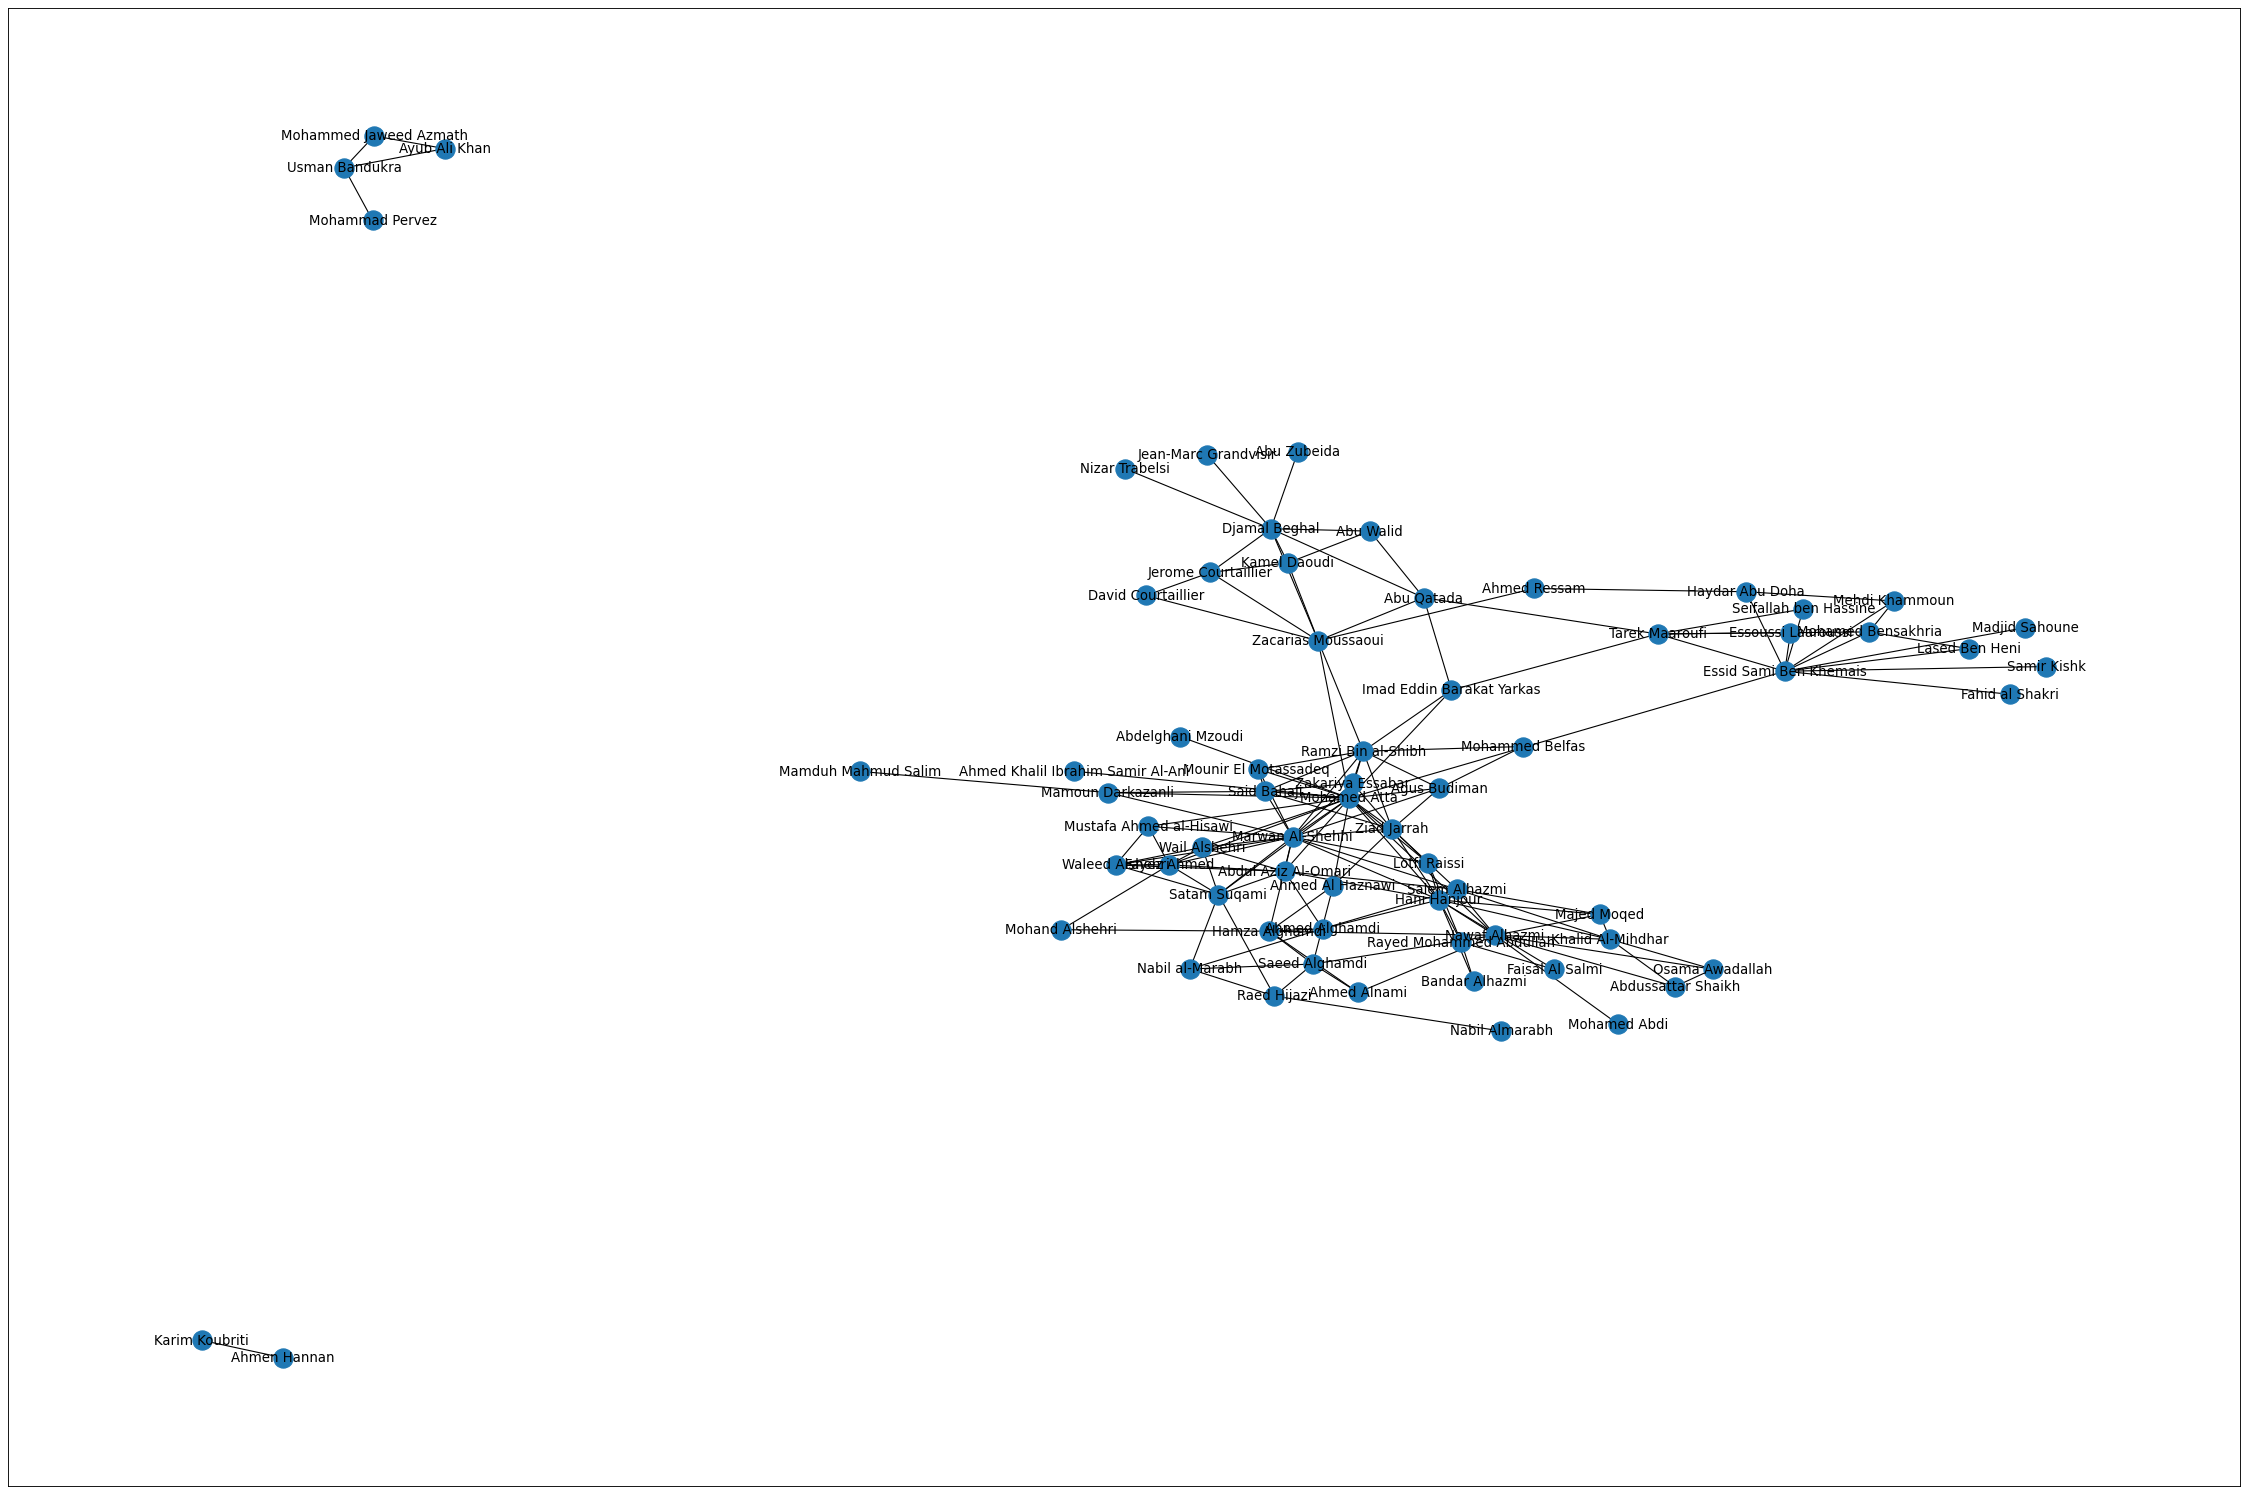

In [5]:
plt.figure(figsize=(36, 24), dpi=80)
nx.draw_networkx(G)

In [6]:
df.query("rating == 5")

,name1,name2,rating,conf
1,Hani Hanjour,Khalid Al-Mihdhar,5,2
6,Nawaf Alhazmi,Hani Hanjour,5,1
11,Nawaf Alhazmi,Saeed Alghamdi,5,1
15,Khalid Al-Mihdhar,Hani Hanjour,5,2
21,Mohamed Atta,Ziad Jarrah,5,2
...,...,...,...,...
347,Samir Kishk,Essid Sami Ben Khemais,5,1
354,Imad Eddin Barakat Yarkas,Tarek Maaroufi,5,2
372,Ziad Jarrah,Salem Alhazmi,5,1
376,Djamal Beghal,Abu Zubeida,5,2


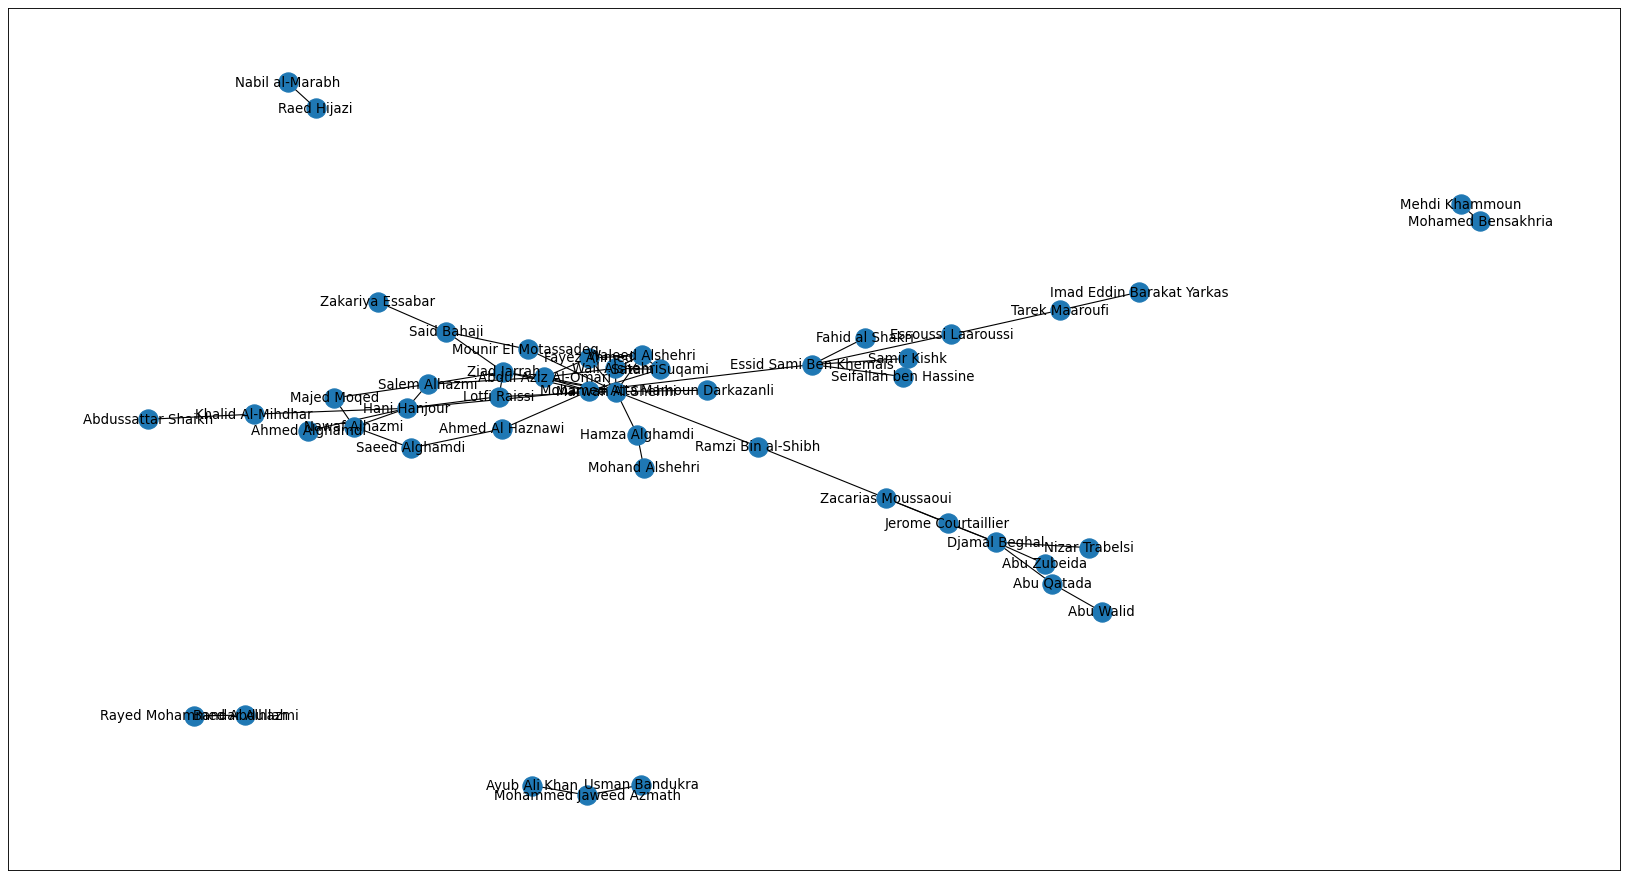

In [7]:
G1 = nx.from_pandas_edgelist(df.query("rating == 5"), source='name1', target='name2', edge_attr=True,)
plt.figure(figsize=(26, 14), dpi=80)
nx.draw_networkx(G1)

### Closeness Centrality
* Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. 
* The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
* Nodes with a high closeness score have the shortest distances to all other nodes.
<div align='right'><sub>https://neo4j.com/docs/graph-data-science/current/algorithms/closeness-centrality/</sub></div>

In [8]:
cc = nx.algorithms.closeness_centrality(G) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'Karim Koubriti': 0.014705882352941176,
 'Ahmen Hannan': 0.014705882352941176,
 'Mohammad Pervez': 0.026470588235294117,
 'Mohammed Jaweed Azmath': 0.03308823529411765,
 'Ayub Ali Khan': 0.03308823529411765,
 'Usman Bandukra': 0.04411764705882353,
 'Nabil Almarabh': 0.21995880064087892,
 'Nizar Trabelsi': 0.22611764705882353,
 'Jean-Marc Grandvisir': 0.22611764705882353,
 'Abu Zubeida': 0.22611764705882353,
 'Abu Walid': 0.23852072474559446,
 'Mamduh Mahmud Salim': 0.25463698993110756,
 'Samir Kishk': 0.27441462021701885,
 'Fahid al Shakri': 0.27441462021701885,
 'Madjid Sahoune': 0.27441462021701885,
 'Lased Ben Heni': 0.2757532281205165,
 'David Courtaillier': 0.27710495963091114,
 'Mohammed Belfas': 0.27710495963091114,
 'Mehdi Khammoun': 0.27847000869313243,
 'Mohamed Abdi': 0.27984857309260336,
 'Bandar Alhazmi': 0.2812408545507755,
 'Faisal Al Salmi': 0.2812408545507755,
 'Abdussattar Shaikh': 0.2826470588235294,
 'Osama Awadallah': 0.2826470588235294,
 'Mohand Alshehri': 0.2826

### Betweenness Centrality
* Betweenness centrality is a way of detecting **the amount of influence** a node has over the flow of information in a graph. 
* It is often used to find nodes that serve as a bridge from one part of a graph to another.
* The algorithm calculates shortest paths between all pairs of nodes in a graph. 
* Each node receives a score, based on the number of shortest paths that pass through the node. 
* Nodes that more frequently lie on shortest paths between other nodes will have higher betweenness centrality scores.
<div align='right'><sub>https://neo4j.com/docs/graph-data-science/current/algorithms/betweenness-centrality/</sub></div>


In [9]:
cc = nx.algorithms.betweenness_centrality(G) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'Bandar Alhazmi': 0.0,
 'Majed Moqed': 0.0,
 'Ahmed Alnami': 0.0,
 'Abdussattar Shaikh': 0.0,
 'Osama Awadallah': 0.0,
 'Zakariya Essabar': 0.0,
 'David Courtaillier': 0.0,
 'Faisal Al Salmi': 0.0,
 'Mohamed Abdi': 0.0,
 'Ahmed Khalil Ibrahim Samir Al-Ani': 0.0,
 'Mounir El Motassadeq ': 0.0,
 'Abdelghani Mzoudi': 0.0,
 'Mamduh Mahmud Salim': 0.0,
 'Mohammed Belfas': 0.0,
 'Mohammed Jaweed Azmath': 0.0,
 'Ayub Ali Khan': 0.0,
 'Nabil Almarabh': 0.0,
 'Lased Ben Heni': 0.0,
 'Essoussi Laaroussi': 0.0,
 'Samir Kishk': 0.0,
 'Fahid al Shakri': 0.0,
 'Seifallah ben Hassine': 0.0,
 'Karim Koubriti': 0.0,
 'Ahmen Hannan': 0.0,
 'Nizar Trabelsi': 0.0,
 'Jean-Marc Grandvisir': 0.0,
 'Abu Zubeida': 0.0,
 'Mohammad Pervez': 0.0,
 'Madjid Sahoune': 0.0,
 'Mohand Alshehri': 0.0004389815627743635,
 'Mehdi Khammoun': 0.0004389815627743635,
 'Rayed Mohammed Abdullah': 0.0006584723441615452,
 'Abu Walid': 0.0007096868598185543,
 'Waleed Alshehri': 0.0007133450395083406,
 'Usman Bandukra': 0.000877963

### Degree Centrality
* The Degree Centrality algorithm can be used to find **popular nodes** within a graph. 
* Degree centrality measures the number of incoming or outgoing (or both) relationships from a node, depending on the orientation of a relationship projection. 
* It can be applied to either weighted or unweighted graphs. 
* In the weighted case the algorithm computes the sum of all positive weights of adjacent relationships of a node, for each node in the graph. Non-positive weights are ignored.

In [10]:
cc = nx.algorithms.degree_centrality(G) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'Mohamed Abdi': 0.014705882352941176,
 'Ahmed Khalil Ibrahim Samir Al-Ani': 0.014705882352941176,
 'Abdelghani Mzoudi': 0.014705882352941176,
 'Mamduh Mahmud Salim': 0.014705882352941176,
 'Nabil Almarabh': 0.014705882352941176,
 'Samir Kishk': 0.014705882352941176,
 'Fahid al Shakri': 0.014705882352941176,
 'Karim Koubriti': 0.014705882352941176,
 'Ahmen Hannan': 0.014705882352941176,
 'Nizar Trabelsi': 0.014705882352941176,
 'Jean-Marc Grandvisir': 0.014705882352941176,
 'Abu Zubeida': 0.014705882352941176,
 'Mohammad Pervez': 0.014705882352941176,
 'Madjid Sahoune': 0.014705882352941176,
 'Bandar Alhazmi': 0.029411764705882353,
 'Mohand Alshehri': 0.029411764705882353,
 'David Courtaillier': 0.029411764705882353,
 'Ahmed Ressam': 0.029411764705882353,
 'Faisal Al Salmi': 0.029411764705882353,
 'Mohammed Belfas': 0.029411764705882353,
 'Mohammed Jaweed Azmath': 0.029411764705882353,
 'Ayub Ali Khan': 0.029411764705882353,
 'Lased Ben Heni': 0.029411764705882353,
 'Essoussi Laaroussi